In [27]:

# Imports
import pandas as pd
import numpy as np
import math
import seaborn as sns

### Gaussian Integral
We want to assess the integral of the product of two Gaussian functions.
$$\int_{-\infty}^{\infty} f(x) g(x) dx$$

However, we are not able to calculate an infinite integral with a computer. We will replace the bounds of (-$\infty$,$\infty$) with a finite interval.
$$\int_{a}^{b} f(x) g(x) dx$$

We will also calculate the integral using the following method:
$$\sum_{i=1}^{N} \sqrt{\Delta{x}} f(a + i \Delta{x}) * \sqrt{\Delta{x}} g(a + i \Delta{x})$$

What is also important to note is what the Gaussian functions are defined as:
$$f(x) = \frac{1}{\sqrt{2 \pi \sigma_1^2}} exp({-\frac{(x - \mu_1)^2}{2 \sigma_1^2}})$$

and

$$g(x) = \frac{1}{\sqrt{2 \pi \sigma_2^2}} exp({-\frac{(\mu_2 - x)^2}{2 \sigma_2^2}})$$

In [25]:
# Defines the Integration parameters
bounds = (-5, 5)
N = 100
delta = (bounds[1] - bounds[0]) / N

# Defines the Gaussian parameters
mu1 = 0
mu2 = 1
sig1 = 1
sig2 = 1

In [8]:
# First Gaussian Function
def f(x, mu1=mu1, sig1=sig1):
    return (1 / (math.sqrt(2 * math.pi) * sig1)) * math.exp((-1 * ((mu1 - x) ** 2)) / (2 * (sig1 ** 2)))

In [9]:
# Second Gaussian Function
def g(x, mu2=mu2, sig2=sig2):
    return (1 / (math.sqrt(2 * math.pi) * sig2)) * math.exp((-1 * ((x - mu2) ** 2)) / (2 * (sig2 ** 2)))

In [22]:
# Creates the two matrixes Ai and Bi
Ai = np.vectorize(f)(np.arange(bounds[0], bounds[1] + delta, delta))
Bi = np.vectorize(g)(np.arange(bounds[0], bounds[1] + delta, delta))

# Scales the matrixes
Ai *= math.sqrt(delta)
Bi *= math.sqrt(delta)

In [23]:
# Dot product of the matrixes
np.matmul(Ai, Bi)

0.21969564472073824

### Adjusting N

To find the value of the integral, with the bounds of ``(-5, 5)``, we will adjust the number of points used to calculate the integral meaning adjusting the value of ``N`` and plotting the results to visualize the plot converge to the solution.

In [28]:
# Creates previous algorithm with a pivotable N value
def pivot_N(N):
    # Calculates new delta
    delta = (bounds[1] - bounds[0]) / N
    
    # Creates the two matrixes Ai and Bi
    Ai = np.vectorize(f)(np.arange(bounds[0], bounds[1] + delta, delta))
    Bi = np.vectorize(g)(np.arange(bounds[0], bounds[1] + delta, delta))
    
    # Scales the matrixes
    Ai *= math.sqrt(delta)
    Bi *= math.sqrt(delta)
    
    return np.matmul(Ai, Bi)

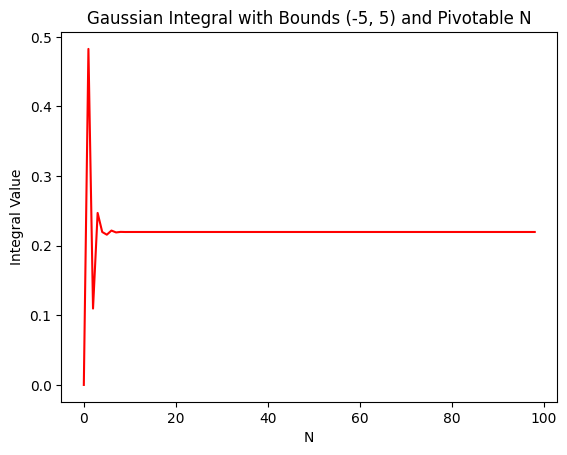

In [45]:
# Obtains results from the pivot_N function
res = np.vectorize(pivot_N)(np.arange(1, 100, 1))

# Plots the results
plt = sns.lineplot(res)
plt.set_title('Gaussian Integral with Bounds (-5, 5) and Pivotable N')
plt.set_xlabel('N')
plt.set_ylabel('Integral Value')
plt.lines[0].set_color('red')

In [46]:
# What it converges to
res[-1]

0.2196956447208079